In [1]:
#import scripts.project_functions

In [2]:
#load_and_process("C:/Users/riora/Documents/A+Documents/UBC/Summer21/DATA301/Project/Data/firesNEW.csv")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import sys

sys.path.append('..\..')
from scripts.project_functions import load_and_process as lnp

In [4]:
#lnp("C:/Users/riora/Documents/A+Documents/UBC/Summer21/DATA301/Project/Data/firesNEW.csv")

In [5]:
df = pd.read_csv("C:/Users/riora/Documents/A+Documents/UBC/Summer21/DATA301/Project/Data/firesNEW.csv", encoding = 'ISO-8859-1', low_memory=False)
#len(original_df)
df.drop(columns=['NWCG_REPORTING_UNIT_NAME', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'DISCOVERY_DOY', 'NWCG_CAUSE_AGE_CATEGORY', 'OWNER_DESCR', 'COUNTY', 'NWCG_GENERAL_CAUSE'], inplace=True)
df.rename(columns = {'NWCG_CAUSE_CLASSIFICATION':'CAUSE'}, inplace = True)
df.dropna(inplace=True)
df.drop(df[(df['FIRE_SIZE_CLASS']=='A')].index, inplace=True)
df.drop(df[(df['FIRE_SIZE_CLASS']=='B')].index, inplace=True)
df.reset_index(inplace=True)
df

,index,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_TIME,CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,16,17,POWER,2004,2004-10-6 0:00:00,1415.0,Human,2004-10-21 0:00:00,295.0,1000.0,16823.0,G,38.523333,-120.211667,CA,6005.0,Amador County
1,17,18,FREDS,2004,2004-10-13 0:00:00,1618.0,Human,2004-10-17 0:00:00,291.0,1800.0,7700.0,G,38.780000,-120.260000,CA,6017.0,El Dorado County
2,25,26,BACHELOR,2004,2004-7-20 0:00:00,1405.0,Natural,2004-7-20 0:00:00,202.0,1600.0,10.0,C,33.315833,-105.512222,NM,35027.0,Lincoln County
3,37,38,HOWARD GAP,2005,2005-1-27 0:00:00,2200.0,Human,2005-1-28 0:00:00,28.0,300.0,50.3,C,35.000278,-83.351111,NC,37113.0,Macon County
4,39,40,AUSTIN CREEK,2005,2005-2-12 0:00:00,1520.0,Human,2005-2-13 0:00:00,44.0,330.0,125.0,D,36.001667,-81.590000,NC,37027.0,Caldwell County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83570,2165253,400480175,10365,2018,2018-11-14 0:00:00,1132.0,Human,2018-11-14 0:00:00,318.0,2234.0,100.0,D,31.771240,-110.700500,AZ,4019.0,Pima County
83571,2165558,400480523,1847,2018,2018-2-17 0:00:00,1540.0,Human,2018-2-17 0:00:00,48.0,2012.0,50.0,C,34.676134,-112.442024,AZ,4025.0,Yavapai County
83572,2165563,400480528,130,2018,2018-6-4 0:00:00,1345.0,Human,2018-6-4 0:00:00,155.0,1800.0,650.0,E,34.516515,-110.437934,AZ,4017.0,Navajo County
83573,2166438,400481557,271409,2018,2018-7-24 0:00:00,829.0,Human,2018-7-24 0:00:00,205.0,903.0,55.0,C,33.323958,-111.909939,AZ,4013.0,Maricopa County


In [6]:
df.describe()

,index,FOD_ID,FIRE_YEAR,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FIPS_CODE
count,8.357500e+04,8.357500e+04,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000,83575.000000
mean,1.259314e+06,1.578844e+08,2009.651953,1449.991194,164.059264,1591.846940,852.996456,36.230623,-96.370409,27278.227987
std,6.572583e+05,1.635250e+08,5.868564,384.197266,92.384588,438.763351,8270.118570,5.268185,14.520799,17014.191060
min,1.600000e+01,1.700000e+01,1992.000000,0.000000,1.000000,0.000000,10.000000,17.962222,-171.405300,1001.000000
25%,5.683855e+05,6.134655e+05,2006.000000,1300.000000,82.000000,1400.000000,15.200000,32.498367,-109.463039,12105.000000
50%,1.476421e+06,2.011455e+08,2010.000000,1452.000000,164.000000,1648.000000,33.000000,35.721017,-94.191883,28035.000000
75%,1.811632e+06,3.002288e+08,2015.000000,1653.000000,232.000000,1857.000000,109.000000,39.006529,-83.248907,41055.000000
max,2.166585e+06,4.004817e+08,2018.000000,2359.000000,366.000000,2359.000000,558198.300000,69.679000,-65.325278,72147.000000


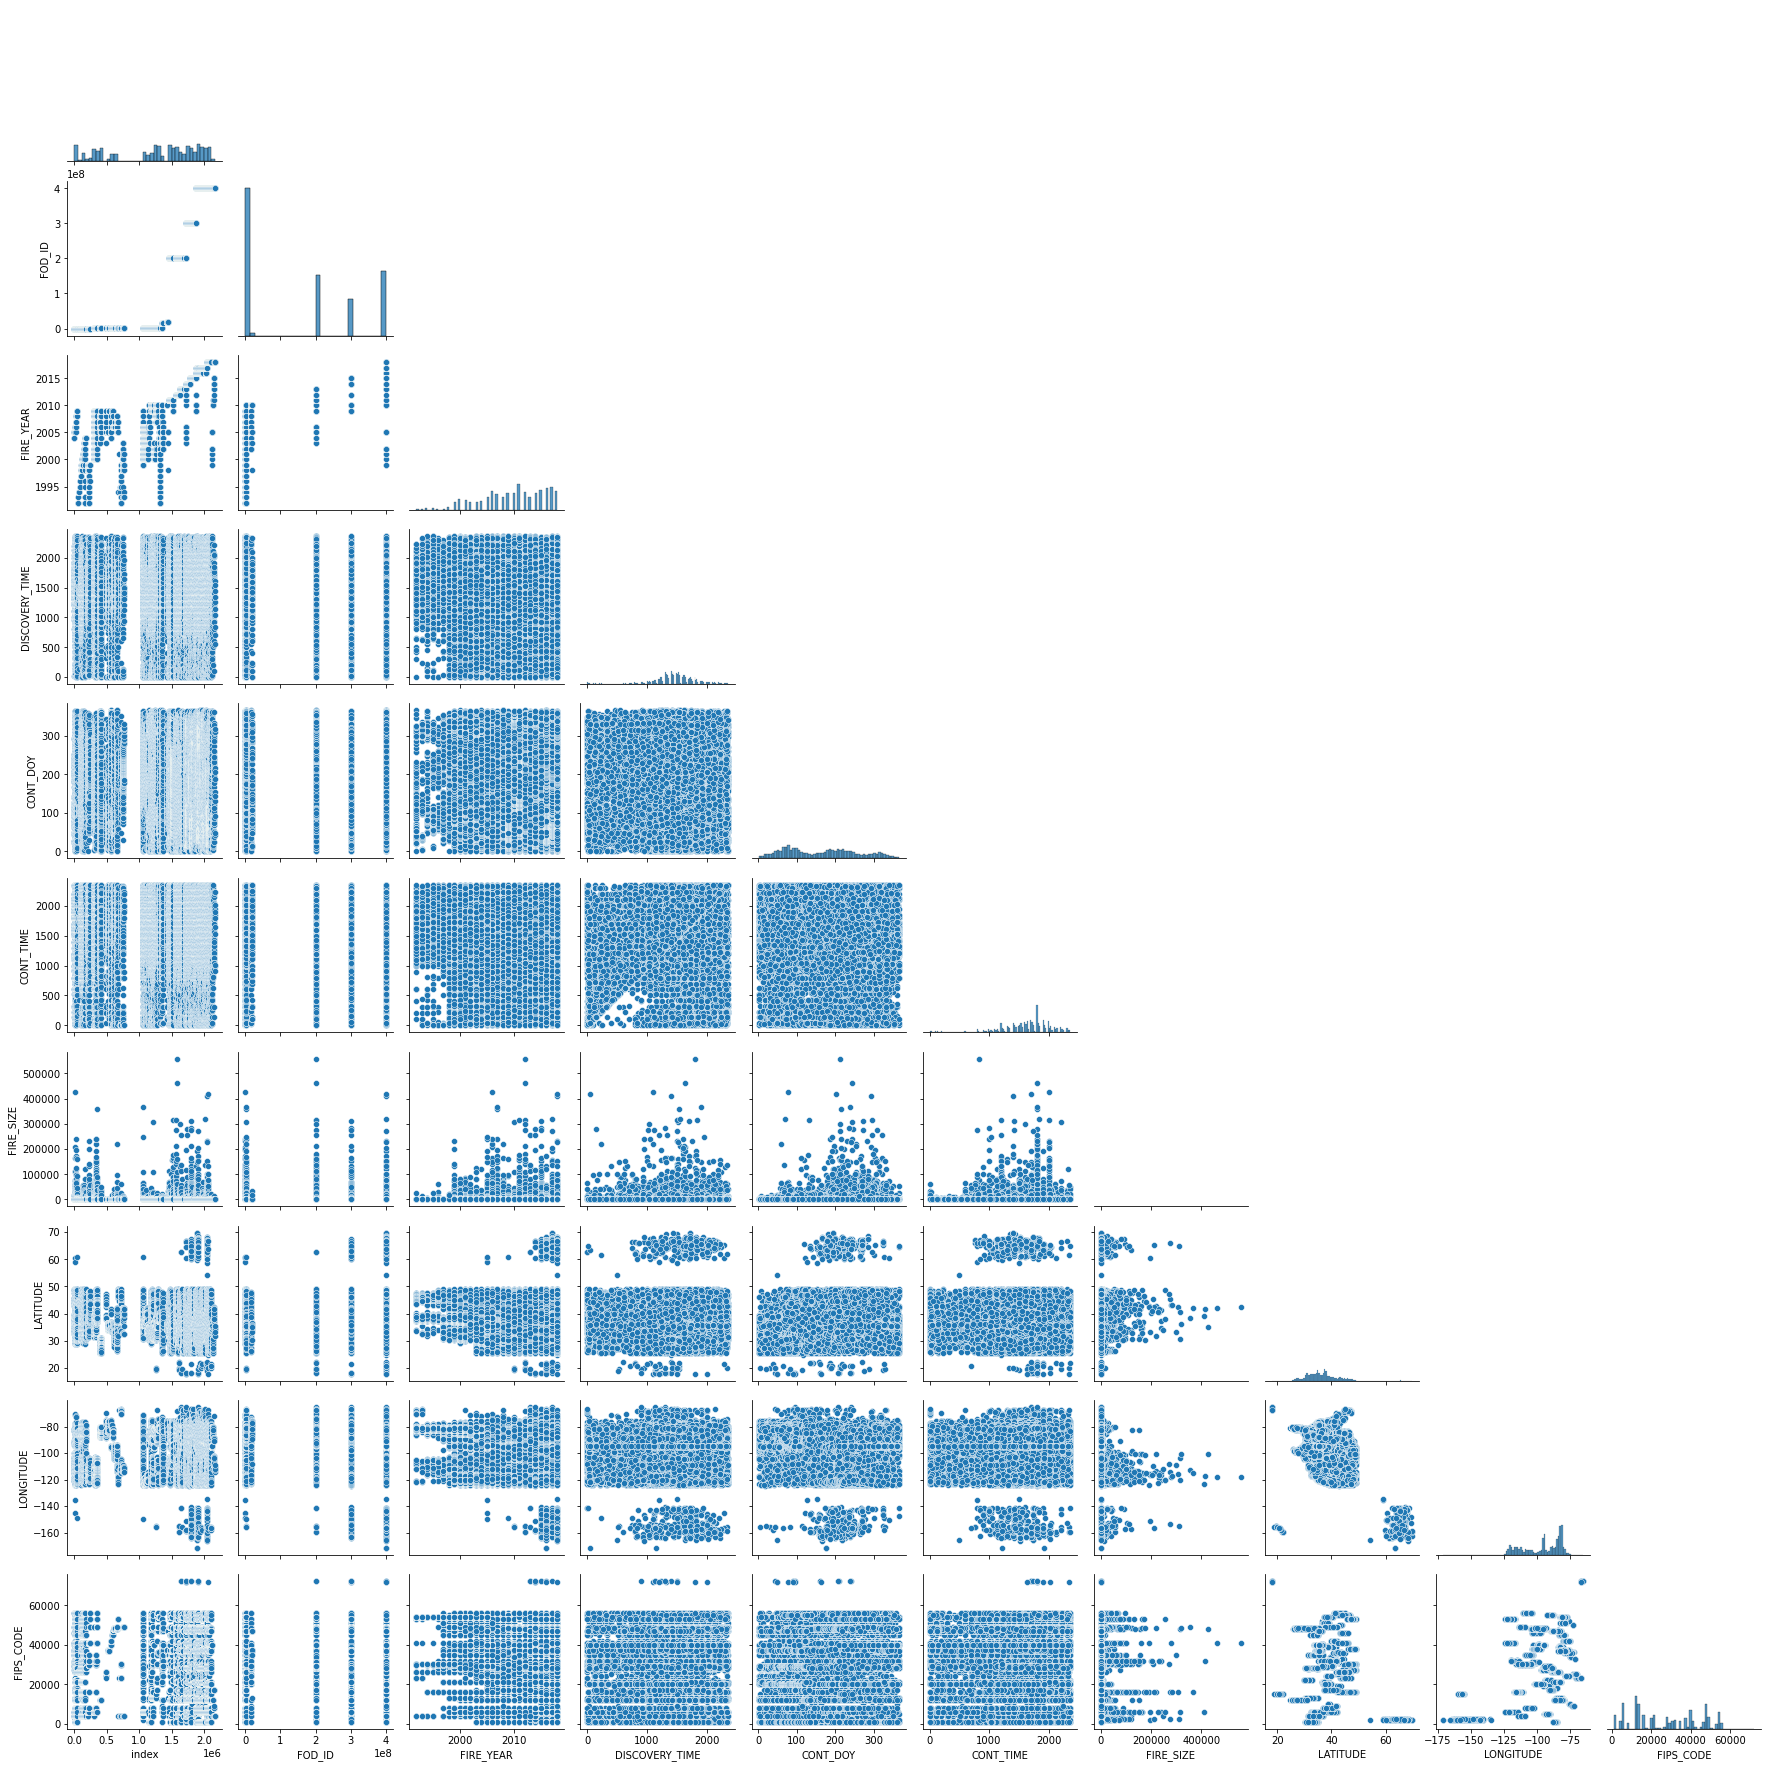

In [7]:
#pearplot to see if I can spot any cool patterns
sns.pairplot(df,corner=True)

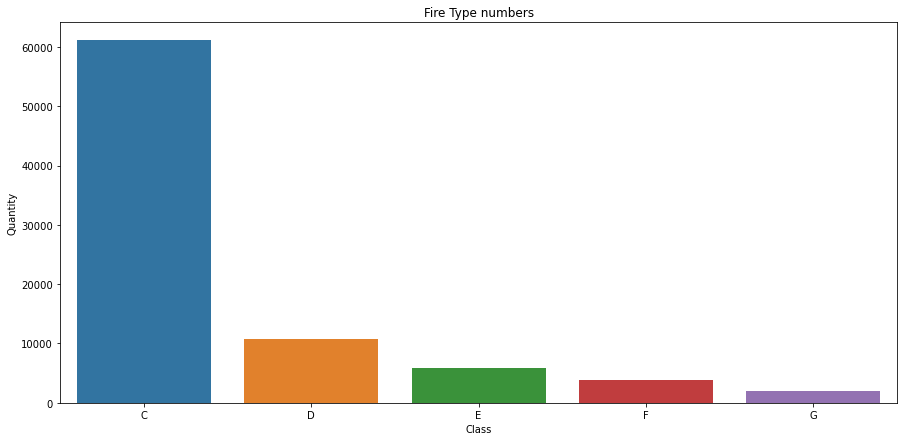

,Class,Quantity
0,C,61107
1,D,10705
2,E,5899
3,F,3838
4,G,2026


In [8]:
#plot how many fires are of each type:

class_Q = pd.DataFrame(df['FIRE_SIZE_CLASS'].value_counts())
class_Q.reset_index(inplace=True)
class_Q.rename(columns = {'index':'Class','FIRE_SIZE_CLASS':'Quantity'}, inplace = True)

dimensions = (15, 7)
fig, ax = plt.subplots(figsize=dimensions)
plot3 = sns.barplot(x="Class", y="Quantity", data=class_Q)
plt.title('Fire Type numbers')
plt.show()
class_Q

Text(0, 0.5, 'Latitude')

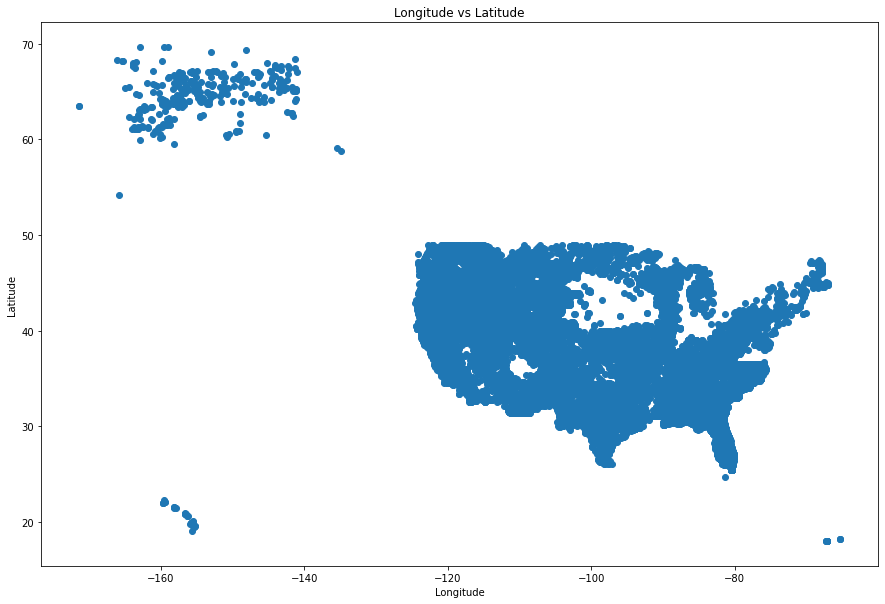

In [9]:
#plot latitude vs longitude:
dimensions = (15, 10)
fig, ax = plt.subplots(figsize=dimensions)
plot1 = plt.scatter(x=df['LONGITUDE'], y=df['LATITUDE'])

plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Latitude')

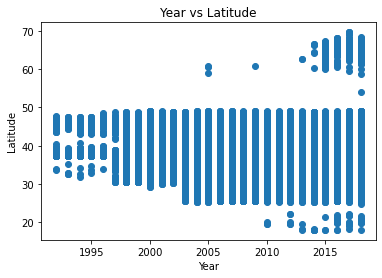

In [10]:
#plot latitude vs fire year:

plot1 = plt.scatter(x=df['FIRE_YEAR'], y=df['LATITUDE'])

plt.title('Year vs Latitude')
plt.xlabel('Year')
plt.ylabel('Latitude')

Text(0, 0.5, 'Longitude')

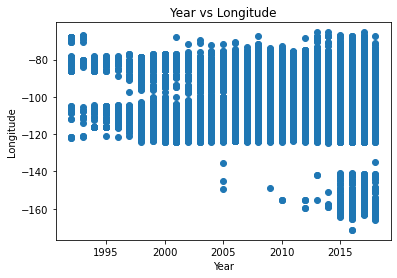

In [11]:
#plot longitude vs fire year:

plot1 = plt.scatter(x=df['FIRE_YEAR'], y=df['LONGITUDE'])

plt.title('Year vs Longitude')
plt.xlabel('Year')
plt.ylabel('Longitude')

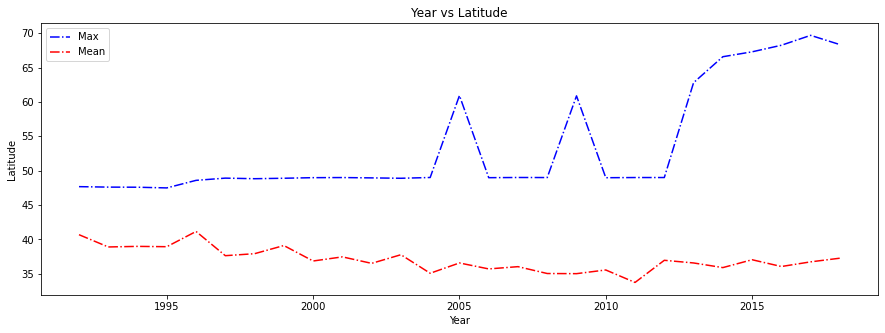

In [12]:
# Take northernmost fire every year and mean fire latitude and plot it versus the year
year_p_lat = df[['FIRE_YEAR', 'LATITUDE']].copy()
max_lat = year_p_lat.groupby(['FIRE_YEAR']).max()
mean_lat = year_p_lat.groupby(['FIRE_YEAR']).mean()
max_lat.reset_index(inplace=True)
mean_lat.reset_index(inplace=True)

latdf = pd.merge(mean_lat, max_lat, how = 'outer', on="FIRE_YEAR")
latdf.rename(columns = {'LATITUDE_x':'MEAN_LAT', 'LATITUDE_y':'MAX_LAT'}, inplace = True)

dimensions = (15, 5)
f, ax = plt.subplots(figsize=dimensions)
ax.plot(latdf['FIRE_YEAR'], latdf['MAX_LAT'], color="blue", label="Max", linestyle="dashdot")
ax.plot(latdf['FIRE_YEAR'], latdf['MEAN_LAT'], color="red", label="Mean", linestyle="dashdot")
plt.title('Year vs Latitude')
plt.xlabel("Year")
plt.ylabel("Latitude")
ax.legend()
plt.show()

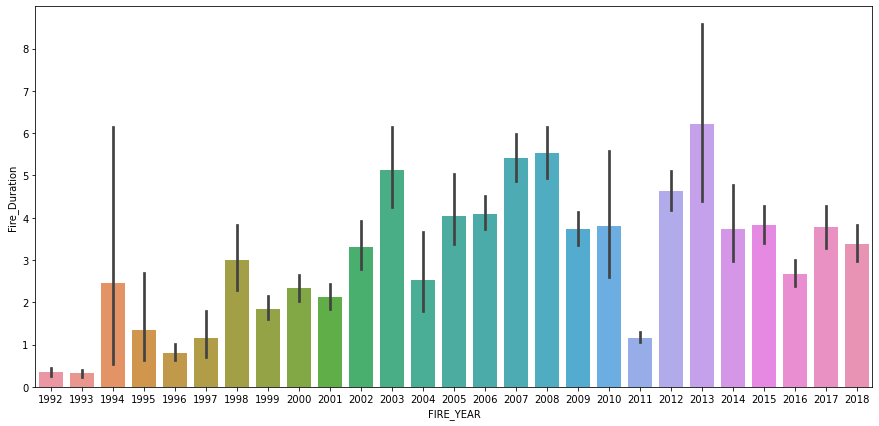

In [13]:
#plot fire duration versus year
year_p_dur = df[['FIRE_YEAR', 'DISCOVERY_DATE', 'CONT_DATE']].copy()

indexNames = year_p_dur[ year_p_dur['CONT_DATE'] == '9999-12-31 0:00:00' ].index
year_p_dur.drop(indexNames , inplace=True)

year_p_dur['Disc_Datetime'] = (pd.to_datetime(year_p_dur['DISCOVERY_DATE'])).dt.date
year_p_dur['Cont_Datetime'] = (pd.to_datetime(year_p_dur['CONT_DATE'])).dt.date

year_p_dur['Fire_Duration'] = (year_p_dur['Cont_Datetime'] - year_p_dur['Disc_Datetime']).dt.days

dimensions = (15, 7)
fig, ax = plt.subplots(figsize=dimensions)
plot3 = sns.barplot(x="FIRE_YEAR", y="Fire_Duration", data=year_p_dur)
plt.show()

#Could also plot duration vs location for all years and see how that changes...somehow

No handles with labels found to put in legend.


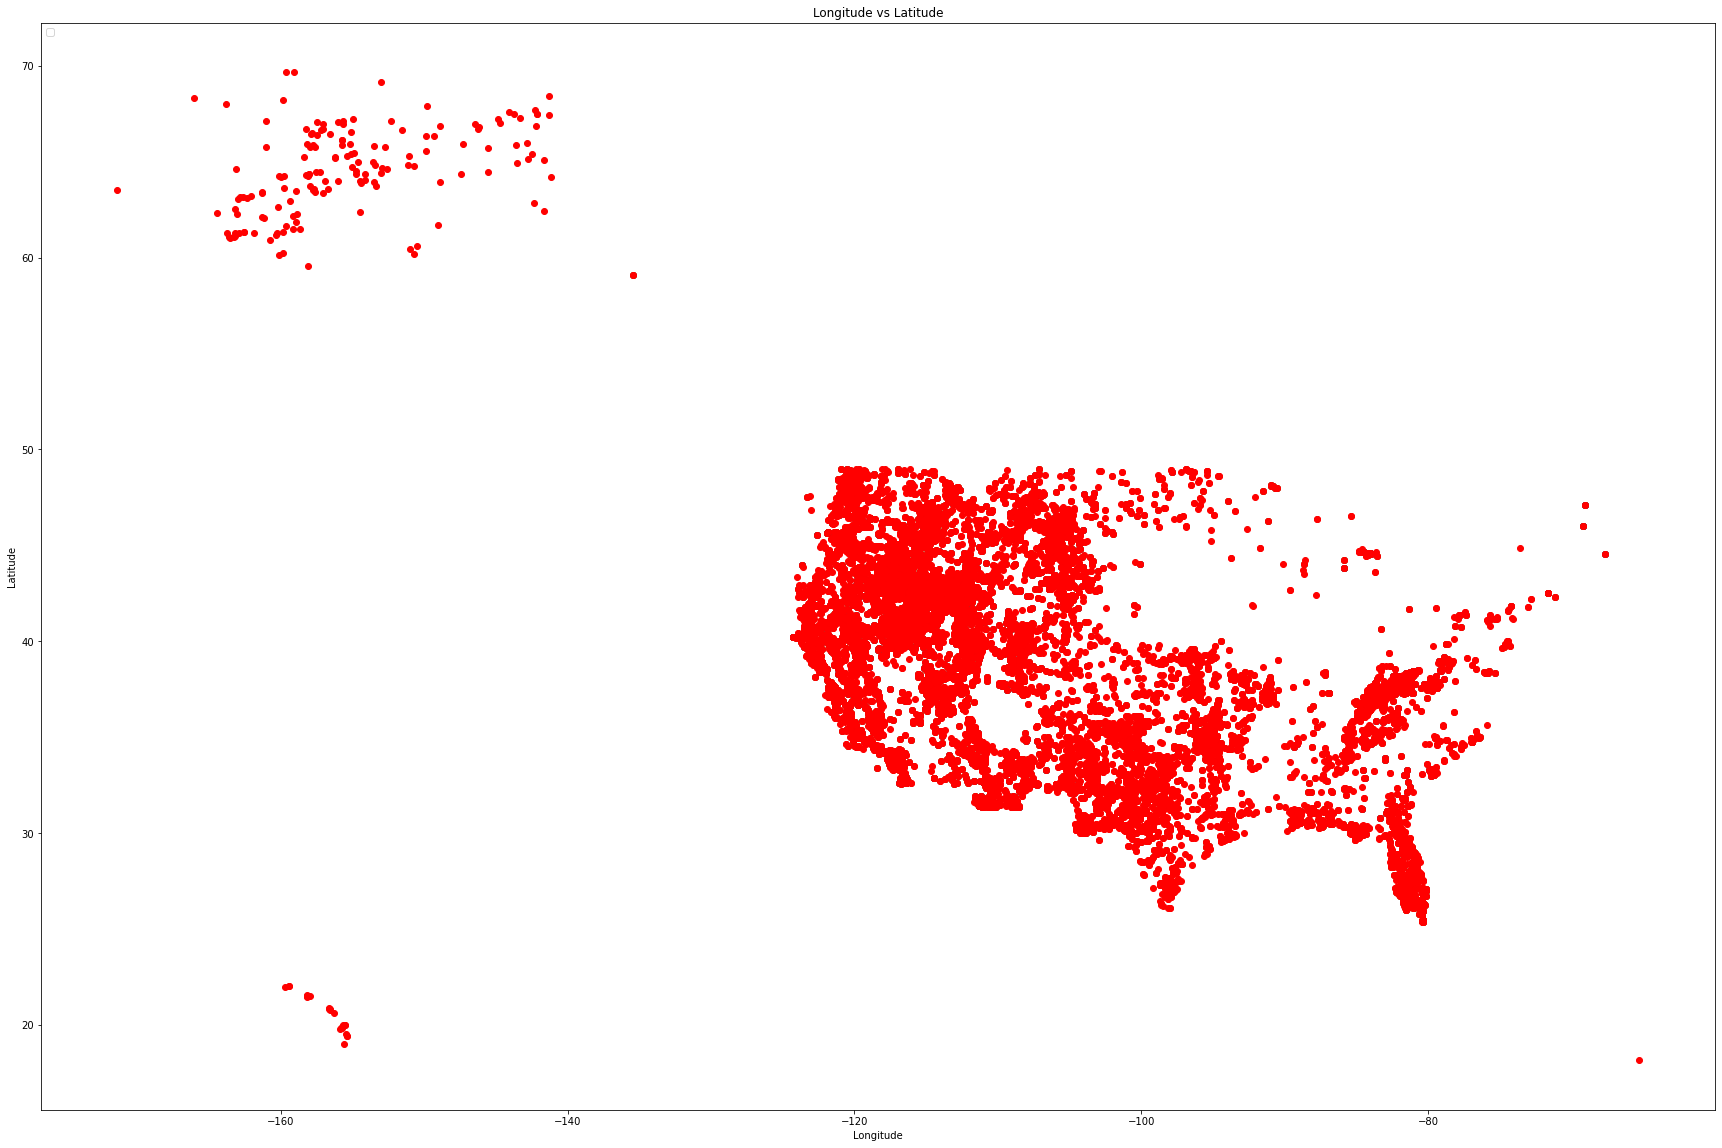

In [14]:
#Plot latitude vs longitude with later years changing colour

span = df['FIRE_YEAR'].max() - df['FIRE_YEAR'].min()
stop1 = int(df['FIRE_YEAR'].min() + 5)
stop2 = int(df['FIRE_YEAR'].min() + 10)
stop3 = int(df['FIRE_YEAR'].min() + 15)
stop4 = int(df['FIRE_YEAR'].min() + 20)
stop5 = df['FIRE_YEAR'].max()

latlong = df[['FIRE_YEAR', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE_CLASS']].copy()
latlong['FIRE_YEAR'] = pd.to_numeric(latlong['FIRE_YEAR'])
latlong.drop(latlong[(latlong['FIRE_SIZE_CLASS']=='C')].index, inplace=True)
latlong.drop(latlong[(latlong['FIRE_SIZE_CLASS']=='D')].index, inplace=True)

one = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop1)].index))
two = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop2)].index))
three = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop3)].index))
four = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop4)].index))
five = pd.DataFrame(latlong.drop(latlong[(latlong['FIRE_YEAR']>stop5)].index))




dimensions = (30, 20)
fig, ax = plt.subplots(figsize=dimensions)
ax.scatter(x=one['LONGITUDE'], y=one['LATITUDE'], c='r')
ax.scatter(x=two['LONGITUDE'], y=two['LATITUDE'], c='b')
ax.scatter(x=three['LONGITUDE'], y=three['LATITUDE'], c='g')
ax.scatter(x=four['LONGITUDE'], y=four['LATITUDE'], c='r')
ax.scatter(x=five['LONGITUDE'], y=five['LATITUDE'], c='r')

plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left');
plt.show()

- **More plots:**
​
    - Plot fires below 50% US latitude's fire duration vs year, and compare to upper 50%
    - Plot fire size/duration vs location for a select number of years
    - Plot fire class frequency vs year for all classes separately, or on same plot
    - Plot latitude vs longitude with later years changing colour
    
    CHoose one more from this if necessary tomorrow, then done